## (1) 데이터 가져오기
sklearn.datasets 의 load_diabetes 에서 데이터를 가져와주세요.
diabetes 의 data 를 df_X 에, target 을 df_y 에 저장해주세요.

In [16]:
import sklearn.datasets

dataset = sklearn.datasets.load_diabetes()

df_x=dataset.data
df_y=dataset.target

print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


## (2) 모델에 입력할 데이터 X 준비하기
df_X 에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [17]:
import numpy as np
df_X=df_x
#df_X = np.array(df_x)
print(df_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


## (3) 모델에 예측할 데이터 y 준비하기
df_y 에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
#df_y = np.array(df_y)
print(df_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

## (4) train 데이터와 test 데이터로 분리하기
X 와 y  데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

## (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W 와 b 를 준비해주세요.
모델 함수를 구현해주세요.

In [8]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    #for i in range(10):
    num_features = X.shape[1]
    for i in range(num_features):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [9]:
def MSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  return mse

def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = MSE(predictions, y)
  return L

## (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient  함수를 구현해주세요.

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [11]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X 에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [12]:
# X_train_ = X

In [13]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6326.6089
Iteration 20 : Loss 5981.6766
Iteration 30 : Loss 5904.5412
Iteration 40 : Loss 5832.7676
Iteration 50 : Loss 5763.2528
Iteration 60 : Loss 5695.8862
Iteration 70 : Loss 5630.5942
Iteration 80 : Loss 5567.3062
Iteration 90 : Loss 5505.9541
Iteration 100 : Loss 5446.4721
Iteration 110 : Loss 5388.7969
Iteration 120 : Loss 5332.8673
Iteration 130 : Loss 5278.6243
Iteration 140 : Loss 5226.0108
Iteration 150 : Loss 5174.9719
Iteration 160 : Loss 5125.4546
Iteration 170 : Loss 5077.4078
Iteration 180 : Loss 5030.7820
Iteration 190 : Loss 4985.5295
Iteration 200 : Loss 4941.6045
Iteration 210 : Loss 4898.9624
Iteration 220 : Loss 4857.5606
Iteration 230 : Loss 4817.3576
Iteration 240 : Loss 4778.3136
Iteration 250 : Loss 4740.3901
Iteration 260 : Loss 4703.5500
Iteration 270 : Loss 4667.7573
Iteration 280 : Loss 4632.9775
Iteration 290 : Loss 4599.1772
Iteration 300 : Loss 4566.3242
Iteration 310 : Loss 4534.3872
Iteration 320 : Loss 4503.3364
Iteration 330 : L

Iteration 2620 : Loss 3063.0210
Iteration 2630 : Loss 3062.0441
Iteration 2640 : Loss 3061.0764
Iteration 2650 : Loss 3060.1181
Iteration 2660 : Loss 3059.1689
Iteration 2670 : Loss 3058.2287
Iteration 2680 : Loss 3057.2975
Iteration 2690 : Loss 3056.3753
Iteration 2700 : Loss 3055.4617
Iteration 2710 : Loss 3054.5569
Iteration 2720 : Loss 3053.6607
Iteration 2730 : Loss 3052.7730
Iteration 2740 : Loss 3051.8937
Iteration 2750 : Loss 3051.0228
Iteration 2760 : Loss 3050.1601
Iteration 2770 : Loss 3049.3055
Iteration 2780 : Loss 3048.4591
Iteration 2790 : Loss 3047.6206
Iteration 2800 : Loss 3046.7901
Iteration 2810 : Loss 3045.9674
Iteration 2820 : Loss 3045.1525
Iteration 2830 : Loss 3044.3452
Iteration 2840 : Loss 3043.5455
Iteration 2850 : Loss 3042.7534
Iteration 2860 : Loss 3041.9687
Iteration 2870 : Loss 3041.1914
Iteration 2880 : Loss 3040.4213
Iteration 2890 : Loss 3039.6585
Iteration 2900 : Loss 3038.9028
Iteration 2910 : Loss 3038.1542
Iteration 2920 : Loss 3037.4126
Iteratio

Iteration 6150 : Loss 2958.9082
Iteration 6160 : Loss 2958.8583
Iteration 6170 : Loss 2958.8089
Iteration 6180 : Loss 2958.7597
Iteration 6190 : Loss 2958.7110
Iteration 6200 : Loss 2958.6625
Iteration 6210 : Loss 2958.6144
Iteration 6220 : Loss 2958.5667
Iteration 6230 : Loss 2958.5193
Iteration 6240 : Loss 2958.4723
Iteration 6250 : Loss 2958.4255
Iteration 6260 : Loss 2958.3792
Iteration 6270 : Loss 2958.3331
Iteration 6280 : Loss 2958.2874
Iteration 6290 : Loss 2958.2420
Iteration 6300 : Loss 2958.1969
Iteration 6310 : Loss 2958.1521
Iteration 6320 : Loss 2958.1077
Iteration 6330 : Loss 2958.0636
Iteration 6340 : Loss 2958.0198
Iteration 6350 : Loss 2957.9762
Iteration 6360 : Loss 2957.9330
Iteration 6370 : Loss 2957.8901
Iteration 6380 : Loss 2957.8476
Iteration 6390 : Loss 2957.8053
Iteration 6400 : Loss 2957.7633
Iteration 6410 : Loss 2957.7216
Iteration 6420 : Loss 2957.6802
Iteration 6430 : Loss 2957.6390
Iteration 6440 : Loss 2957.5982
Iteration 6450 : Loss 2957.5577
Iteratio

Iteration 9840 : Loss 2951.8493
Iteration 9850 : Loss 2951.8430
Iteration 9860 : Loss 2951.8368
Iteration 9870 : Loss 2951.8306
Iteration 9880 : Loss 2951.8244
Iteration 9890 : Loss 2951.8183
Iteration 9900 : Loss 2951.8122
Iteration 9910 : Loss 2951.8060
Iteration 9920 : Loss 2951.8000
Iteration 9930 : Loss 2951.7939
Iteration 9940 : Loss 2951.7879
Iteration 9950 : Loss 2951.7819
Iteration 9960 : Loss 2951.7759
Iteration 9970 : Loss 2951.7699
Iteration 9980 : Loss 2951.7640
Iteration 9990 : Loss 2951.7580
Iteration 10000 : Loss 2951.7521


## (10) test 데이터에 대한 성능 확인하기

test 데이터에 대한 성능을 확인해주세요.

In [14]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2824.501093201547

## (11) 정답 데이터와 예측한 데이터 시각화하기

x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

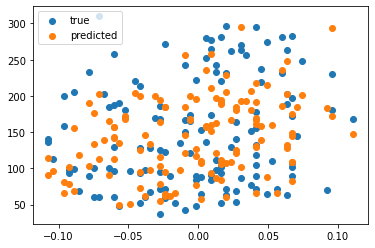

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="predicted")
plt.legend()
plt.show()